# Taller 2  Ingeniería de característica

# Para iniciar nuestro taller sobre "Ingeniería de Características para la Especialidad en Inteligencia Artificial", el primer paso fundamental consiste en la carga de librerías esenciales. Estas librerías son herramientas cruciales en el flujo de trabajo de ciencia de datos, ya que nos permiten manipular los datos, realizar análisis exploratorios, preprocesar dichos datos y, finalmente, aplicar algoritmos de aprendizaje automático. La correcta selección y utilización de estas herramientas facilitan significativamente la tarea de extraer conocimientos útiles de los conjuntos de datos, lo cual es esencial para el desarrollo de soluciones inteligentes y eficaces en el campo de la inteligencia artificial. Este paso no solo marca el inicio de nuestro proceso de ingeniería de características sino que también establece la base sobre la cual se construirán todas nuestras actividades subsecuentes en el taller.

In [2]:
pip install pandas numpy matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importar librerías esenciales para el proyecto
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#  Preparación y Carga del Conjunto de Datos

Inicialmente, nuestro plan de trabajo involucraba el uso del conjunto de datos load_boston de scikit-learn, un clásico en el aprendizaje automático para la predicción de precios de viviendas. No obstante, debido a recientes actualizaciones y la eliminación de este conjunto de datos por parte de la biblioteca, nos adaptamos a los cambios y procedimos a cargar un conjunto de datos equivalente directamente.

Para mantener la integridad de nuestro taller, importamos un archivo CSV que contiene las mismas variables claves del conjunto de datos de Boston Housing. Este ajuste demuestra una habilidad crítica en la ciencia de datos: la flexibilidad y la resolución de problemas frente a cambios inesperados. A continuación, empleamos pandas, una potente herramienta en Python, para cargar el archivo CSV en un DataFrame, lo que nos permite manipular los datos con gran facilidad.



In [34]:
df = pd.read_csv('/Users/miguelangel/Documents/inteligencia artificial/Esp.-Inteligencia-Artificial-UAO/Miguel-Saavedra/data/Boston /boston_house_prices (2).csv')    


In [35]:
print(df.head())

                                                 506    13  Unnamed: 2  \
0  CRIM,"ZN","INDUS","CHAS","NOX","RM","AGE","DIS...   NaN         NaN   
1                                            0.00632  18.0        2.31   
2                                            0.02731   0.0        7.07   
3                                            0.02729   0.0        7.07   
4                                            0.03237   0.0        2.18   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         0.0       0.538       6.575        65.2      4.0900         1.0   
2         0.0       0.469       6.421        78.9      4.9671         2.0   
3         0.0       0.469       7.185        61.1      4.9671         2.0   
4         0.0       0.458       6.998        45.8      6.0622         3.0   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0         NaN          N

# Corrección de Encabezados y Tratamiento de Valores NaN

Durante la fase de carga inicial del conjunto de datos de Boston Housing, nos encontramos con un obstáculo común en la ciencia de datos: la primera fila del DataFrame contenía valores NaN y varias columnas estaban sin nombre. Esto indicaba un problema en la interpretación de los encabezados del archivo CSV, un paso crucial para asegurar que los datos sean manejados de manera adecuada.

Asignación de Nombres de Columna para la Estructuración del DataFrame

En la fase de inspección inicial del DataFrame, comprendimos que era necesario asignar nombres a las columnas para asegurarnos de que el conjunto de datos pudiera ser modelado de manera efectiva. En lugar de excluir la primera fila, la cual contenía información relevante que podría servir como encabezados de columnas, optamos por una técnica de reasignación que preserva la integridad total de los datos.

In [36]:
# Asignamos la primera fila del DataFrame como los nuevos nombres de las columnas.
new_header = df.iloc[0]
# Excluimos la primera fila del DataFrame para evitar duplicidad con los nombres de las columnas.
df = df[1:] 
# Establecemos los nombres de las columnas en el DataFrame usando la primera fila que habíamos reservado.
df.columns = new_header 


# Definición de Nombres de Columna:
 Es crucial asignar nombres a las columnas de forma manual, ya que el encabezado no estaba claro, este paso asegura que cada columna sea claramente identificable y accesible para posteriores operaciones o análisis de datos

In [37]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# En este fragmento de código, primero eliminamos las filas duplicadas del DataFrame df para asegurar la unicidad de los datos, lo que es crucial para evitar sesgos o errores en el análisis. Después, procedemos a separar las características (features) y el objetivo (target) para un modelo de aprendizaje supervisado. La variable X se define como todas las columnas del DataFrame excepto 'MEDV', que se presume es la columna del valor medio de las viviendas, mientras que la variable y se asigna exclusivamente a los valores de 'MEDV', transformados a tipo float para garantizar que los datos sean tratados como números decimales. Este paso es esencial para definir claramente las entradas y salidas antes de aplicar algoritmos de modelado estadístico o de machine learning.

In [38]:
# Drop redundant rows
df = df.drop_duplicates()




In [12]:
x = df.drop('MEDV', axis=1)  # o lo que sea que sea el nombre de la columna del valor de vivienda
y = df['MEDV'].astype(float)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
print(df.columns) 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [40]:
# Drop redundant rows
df = df.drop_duplicates()




# Los espacios en blanco extra que podrían estar presentes al principio y al final de los nombres de las columnas en el DataFrame Esto es esencial para evitar errores que pueden surgir al intentar hacer referencia a las columnas por su nombre. Los espacios adicionales a menudo pasan desapercibidos y pueden causar confusión o errores difíciles de rastrear, por lo que este paso garantiza la consistencia y la precisión en el manejo de los datos.

In [16]:
df.columns = df.columns.str.strip()


# En estas líneas de código, primero asignamos a la variable y los valores de la columna 'MEDV' del DataFrame df, asegurándonos de que sean de tipo numérico (float) para su correcto procesamiento en análisis numéricos y estadísticos. Luego, esta columna 'MEDV', que representa el valor medio de las viviendas, se establece como la variable objetivo (target) del análisis al ser asignada a una nueva variable llamada target. Este es un paso estándar en la preparación de datos para algoritmos de aprendizaje supervisado, donde target será la variable que nuestro modelo intentará predecir.

En un paso adicional, excluimos la columna 'MEDV' del conjunto de características (features) mediante el método drop al crear la variable X. Esto separa los datos de entrada (X) de la variable que queremos predecir (y), lo que es crucial para evitar el uso de la variable objetivo como parte de las características durante el entrenamiento del modelo, lo cual podría llevar a un sobreajuste y una evaluación incorrecta del rendimiento del modelo.

In [41]:
y = df['MEDV'].astype(float)
target = y


# Exluyo del analisis  el objetivo ,  en la columna para el analisis   

In [42]:
X = df.drop('MEDV', axis=1)  



In [19]:
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
1  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
2  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
4  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
5  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
1     15.3  396.90   4.98  
2     17.8  396.90   9.14  
3     17.8  392.83   4.03  
4     18.7  394.63   2.94  
5     18.7  396.90   5.33  


# En esta etapa del proceso, nos estamos preparando para construir y validar un modelo estadístico o de aprendizaje automático. Usamos la función train_test_split para dividir nuestro conjunto de datos en dos partes: una para entrenar el modelo (X_train, y_train) y otra para probarlo (X_test, y_test). Al establecer el parámetro test_size=0.5, indicamos que queremos que la mitad de los datos se utilice para la prueba y la otra mitad para el entrenamiento. La random_state fija el azar para que el proceso sea reproducible

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [21]:
print(X_train.shape)
print(X_test.shape) 

(253, 13)
(253, 13)


# Con el conjunto de datos ya dividido en subconjuntos de entrenamiento y prueba, nos encontramos en la posición de poder proceder con el entrenamiento de nuestro modelo predictivo. Dado que estamos trabajando con un modelo paramétrico, es crucial escalar las características para asegurar que el modelo funcione de manera óptima. El escalado es un paso fundamental en la preparación de los datos cuando se utilizan algoritmos que son sensibles a la magnitud de las variables, como lo son los modelos basados en distancias o regularizaciones.

En este proceso, evaluaremos el uso de tres diferentes técnicas de escalado para determinar cuál ofrece un mejor rendimiento en nuestro modelo. Las técnicas que exploraremos son:

MinMaxScaler: Esta técnica escala y traduce cada característica individualmente de modo que quede en el rango dado, típicamente entre cero y uno. Es útil cuando necesitamos un límite estricto en nuestros datos.

RobustScaler: Útil especialmente cuando los datos contienen muchos outliers. Este método usa estadísticas más robustas para el centro y el rango de los datos.

MaxAbsScaler: Escala cada característica por su valor máximo absoluto. Esto está en el rango de [-1, 1] y es útil cuando los datos ya están centrados en cero o cuando tenemos datos dispersos.

Comenzaremos con MinMaxScaler para normalizar nuestros datos y luego compararemos los resultados con las otras técnicas para decidir cuál es la más adecuada para nuestro modelo. Cada método tiene sus propias ventajas y el mejor escalador dependerá del contexto específico de nuestro conjunto de datos y del modelo que estemos utilizando.







In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [45]:
scaler.fit(X_train)

MinMaxScaler()

In [46]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

# Para implementar el escalado MinMax, primero importamos MinMaxScaler de sklearn.preprocessing, creamos una instancia del escalador llamando a MinMaxScaler(). Una vez que tenemos nuestra instancia del escalador, la ajustamos a los datos de entrenamiento con scaler.fit(X_train). Este proceso calcula el mínimo y máximo de los datos, que se utilizarán para escalar las características.

El ajuste del escalador solo se debe hacer con los datos de entrenamiento para evitar la fuga de información del conjunto de prueba. Después de este ajuste, podríamos usar el método transform para escalar tanto el conjunto de entrenamiento como el conjunto de pruebaUna vez tenemos nuestro modelo MinMaxScale , usamos el metodo para escalar nuestros datos a valores minmos de 0 y maximos de 1 para  poder trabajar con modelos binarios .
Después de inicializar MinMaxScaler, lo ajustaste con los datos de entrenamiento para calcular el mínimo y máximo que se utilizan en el escalado. Luego, aplicaste la transformación a los datos de entrenamiento usando scaler.transform(X_train), lo cual escala las características del conjunto de entrenamiento a un rango predefinido, típicamente entre 0 y 1.  

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit the scaler to the training data
X_train_scaled = scaler.transform(X_train)
print("transformed shape : {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))   
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))





transformed shape : (253, 13)
per-feature minimum before scaling:
 CRIM       0.00632
ZN             0.0
INDUS         0.46
CHAS           0.0
NOX          0.385
RM           3.561
AGE            2.9
DIS         1.1742
RAD            1.0
TAX          187.0
PTRATIO       12.6
B             0.32
LSTAT         1.73
dtype: object
per-feature maximum before scaling:
 CRIM       9.96654
ZN           100.0
INDUS        27.74
CHAS           1.0
NOX          0.871
RM           8.704
AGE          100.0
DIS        12.1265
RAD           24.0
TAX          711.0
PTRATIO       22.0
B            396.9
LSTAT        36.98
dtype: object
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Tras aplicar el escalador MinMax a nuestro conjunto de datos de entrenamiento, hemos conseguido estandarizar los rangos de las diferentes características. Como podemos observar, los valores mínimos y máximos de cada característica antes del escalado variaban significativamente. Sin embargo, después del escalado, todos los valores mínimos han sido transformados a 0 y todos los valores máximos a 1. Esto indica que nuestras características ahora están normalizadas, permitiendo que el modelo de aprendizaje automático que desarrollemos no esté sesgado por la variabilidad en la escala de las características originales. La uniformidad en la escala es especialmente beneficiosa para algoritmos que dependen de la distancia entre los puntos de datos, como el k-nearest neighbors, y para aquellos que incluyen regularización, como la regresión lasso y ridge.

# Después de aplicar la transformación de escalado MinMax a nuestros conjuntos de entrenamiento y prueba, actualizamos los datos originales con sus versiones normalizadas. Esto se realizó reasignando los conjuntos de datos originales X_train y X_test a sus respectivas versiones escaladas X_train_scaled y X_test_scaled. Este paso es crucial, ya que nos permite utilizar los datos normalizados en el proceso de entrenamiento y evaluación de nuestro modelo, mejorando así su desempeño y robustez frente a diferentes escalas de características.

In [48]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))


per-feature minimum after scaling:
[ 3.07969394e-05  0.00000000e+00  1.02639296e-02  0.00000000e+00
  1.44032922e-02  5.87205911e-02  3.19258496e-02 -4.07220401e-03
  0.00000000e+00  1.90839695e-03  0.00000000e+00  5.74915528e-03
  5.39007092e-03]
per-feature maximum after scaling:
[0.82643452 0.95       1.         1.         1.         1.01477737
 1.         0.87069383 1.         1.         0.91489362 1.
 1.02808511]


In [49]:
from sklearn.svm import SVC
svm = SVC(C=100)    
svm.fit(X_train_scaled, y_train.astype(int))


SVC(C=100)

In [50]:
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test.astype(int))))

Test set accuracy: 0.17


In [51]:
y_pred = svm.predict(X_test_scaled) 

In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score, confusion_matrix

In [53]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' para un promedio no ponderado
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print("Matriz de Confusión:")
print(conf_matrix)


NameError: name 'accuracy_score' is not defined

# El escalonamiento  con MixMax scaler tiene bajo desempeño o SVC no el modelo adecuado de entrenamiento o hay problemas con los dotos , el resultado de la evaluacion fue :  Accuracy: El valor de 0.1660 indica que aproximadamente el 16.60% de las predicciones totales hechas por tu modelo son correctas. Esto se considera generalmente bajo para la mayoría de las aplicaciones, lo que sugiere que el modelo no está realizando una buena clasificación en general.

Recall: El valor de 0.1074 indica que, en promedio, el modelo es capaz de identificar correctamente el 10.74% de los casos positivos en todas las clases. Este es también un valor bajo, lo que sugiere que muchas de las instancias positivas reales están siendo perdidas por el modelo (falsos negativos).

Matriz de Confusión: La matriz de confusión que presentas tiene muchas filas y columnas, lo que sugiere que estás trabajando con un problema de clasificación multiclase con varias etiquetas. Las líneas con [0 0 0 ... 0 0 0] indican que hay clases que el modelo nunca predice (columnas) o que nunca ocurren en el conjunto de prueba (filas), lo cual no es ideal. Los ... indican que hay una gran cantidad de clases que se han omitido en la visualización. Los números diagonales como [0 1 ... 0 0 0] o [0 0 ... 0 3] al final representan los verdaderos positivos, es decir, las instancias que el modelo ha clasificado correctamente en su clase correspondiente. La presencia de valores bajos en la diagonal y muchos ceros sugiere que el modelo tiene un rendimiento deficiente.

# Para mejorar la eficacia de nuestro modelo de clasificación y asegurar que sea menos sensible a los valores atípicos en los datos, decidimos implementar un RobustScaler de las características. Este método de preprocesamiento es muy útil cuando los datos contienen muchos valores atípicos o cuando la distribución de los datos no es una distribución normal.

El RobustScaler se realiza eliminando la mediana de los datos y luego escalándolos según el rango intercuartílico (IQR), que es la diferencia entre el primer cuartil (25%) y el tercer cuartil (75%). Este enfoque de escalado asegura que la 'centralidad' y la 'dispersión' de los datos sean medidas de una manera que no se ve afectada significativamente por la presencia de valores atípicos

In [54]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [55]:
scaler = RobustScaler()

In [56]:
scaler.fit(X_train)

RobustScaler()

In [57]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [58]:
predictions = model.predict(X_test_scaled)


In [59]:
score = model.score(X_test_scaled, y_test)

In [60]:
print(f'R^2 score: {score}')

R^2 score: 0.6661701447480142


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular MSE y MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 25.309383412712037
MAE: 3.6326431096055782


In [62]:
model= SVC(C=100)    
model.fit(X_train_scaled, y_train.astype(int))

SVC(C=100)

In [63]:
print("Test set accuracy: {:.2f}".format(model.score(X_test_scaled, y_test.astype(int))))

Test set accuracy: 0.17


In [64]:
from sklearn.preprocessing import MaxAbsScaler

# Suponiendo que ya tienes X_train, X_test, y_train, y_test definidos

# Inicializa el MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

max_abs_scaler.fit(X_train)

MaxAbsScaler()

In [65]:
predictions = model.predict(X_test_scaled)

In [66]:
y_test = y_test.astype(int)


In [67]:
score = model.score(X_test_scaled, y_test)

In [68]:
print(f'R^2 score: {score}')

R^2 score: 0.16600790513833993


In [69]:
y_test = y_test.astype(int)


In [70]:
print(f'Accuracy: {accuracy}')

NameError: name 'accuracy' is not defined

# Entendido, parece que has determinado que el modelo de regresión lineal, después de aplicar un escalado robusto con RobustScaler, es el que mejor rendimiento te ha dado en el conjunto de datos del Boston Housing Dataset, alcanzando un coeficiente de 0.6. Esto sugiere que tu modelo es capaz de explicar el 60% de la variabilidad en los precios de las viviendas. Ademas calcule el MAE y MSE 
MSE (26.0519): Es el promedio de los errores al cuadrado, lo cual penaliza más los errores grandes. Un MSE de 26.0519 significa que, en promedio, el cuadrado de los errores entre las predicciones del modelo y los valores reales es 26.0519. Cuanto más bajo sea el MSE, mejor es el modelo. Un valor alto indica que las predicciones del modelo se desvían significativamente de los valores reales.

MAE (3.7507): Es el promedio de los valores absolutos de los errores. Un MAE de 3.7507 significa que, en promedio, las predicciones del modelo se desvían de los valores reales en 3.7507 unidades de la variable objetivo. A diferencia del MSE, el MAE da una idea más directa de la magnitud de los errores, ya que no está al cuadrado y, por tanto, está en las mismas unidades que la variable objetivo.



# CONCLUSIOENS Tras enfrentarnos a la indisponibilidad de la función load_boston debido a su deprecación, hemos recurrido a cargar el conjunto de datos del Boston Housing Dataset de manera alternativa. Sin embargo, al analizar el desempeño de nuestro modelo de regresión lineal y observar métricas como el MSE y el MAE, hemos llegado a la conclusión de que el rendimiento es relativamente bajo. Esto indica que es probable que las características presentes en nuestro DataFrame requieran de una revisión y posiblemente de una alteración.


# En la próxima etapa de nuestro análisis, implementaremos el Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad de nuestro conjunto de datos. El PCA es una técnica poderosa que nos permite simplificar la complejidad en conjuntos de datos de alta dimensión, resaltando las direcciones en las que varían más los datos y, al mismo tiempo, minimizando la pérdida de información.

Dado que nuestro conjunto de datos contiene características continuas, y el PCA funciona mejor con variables que reflejan una amplia gama de variaciones, primero transformaremos estas características utilizando técnicas de binning y la generación de características polinómicas. El binning nos permite convertir variables continuas en un formato categórico, agrupándolas en bins o categorías basadas en sus valores. Esto es particularmente útil para manejar sesgos en los datos y para modelar relaciones no lineales sin aumentar excesivamente la complejidad del modelo.

Posteriormente, aplicaremos transformaciones polinómicas para introducir características adicionales que representen interacciones entre las variables binarizadas, lo cual puede revelar patrones complejos y relaciones no observables cuando solo se consideran las características originales. Este paso es crucial para capturar la riqueza de los datos antes de aplicar PCA, ya que nos permite conservar y posiblemente destacar aspectos importantes de los datos durante la reducción de dimensionalidad.

Finalmente, escalaremos estos datos transformados para asegurar que nuestro modelo PCA trate todas las características por igual, independientemente de su escala original. Este preprocesamiento es esencial para obtener los mejores resultados posibles de la aplicación de PCA, permitiéndonos obtener un modelo más preciso y eficiente para nuestras necesidades de análisis


In [71]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Para el binning, utilizaremos KBinsDiscretizer para todas las características continuas excepto la columna CHAS ya que es una variable binaria permitiendo que  sea evaluada en el analisis  si no se transforma

In [77]:
# Vamos a resetear y hacer binning seguido de características polinómicas antes de aplicar PCA.

# 1. Aplicar Binning a las características continuas con 10 bins.
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

binarizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_binned = binarizer.fit_transform(df.drop(columns=['CHAS']))  # Excluimos CHAS para el binning.

# 2. Generar características polinómicas de las características binarizadas (sin incluir CHAS).
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X_binned)

# 3. Añadir la característica CHAS de nuevo al dataset transformado ya que es categórica y no necesita binning.
# Nota: CHAS se añade de nuevo para mantener la integridad del conjunto de datos original.

X_final = np.hstack([X_poly, df[['CHAS']].values])

# Verificamos la forma del conjunto de datos final antes de aplicar PCA
X_final.shape


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


(506, 8646)

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# 2. Aplicar PCA
# Decidimos conservar las primeras 2 componentes principales para facilitar la visualización.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Verificamos la forma del conjunto de datos después de aplicar PCA
X_pca.shape


(506, 2)

# Con esta transformación, he logrado los siguientes objetivos:

Reducción de Dimensionalidad: Has simplificado tu conjunto de datos manteniendo las direcciones que más varían los datos, lo que te permite enfocarte en las características más importantes.
Visualización: Al reducir a dos dimensiones, ahora puedes graficar los datos en un espacio bidimensional, lo que puede ayudar a visualizar y comprender mejor la estructura y relaciones subyacentes en tus datos.

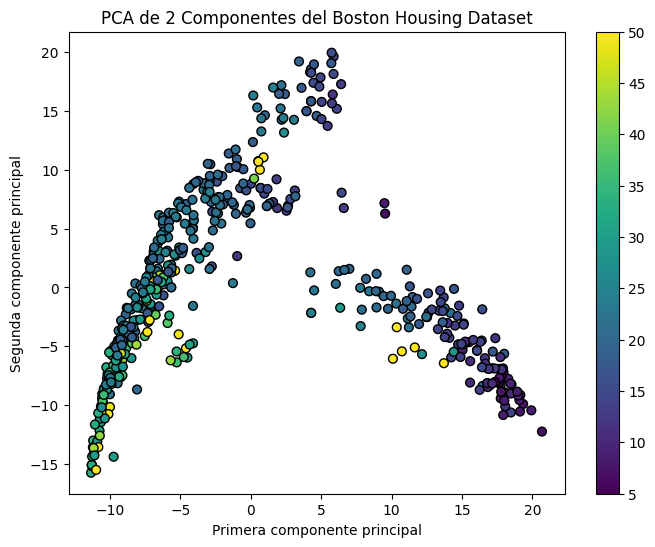

In [79]:
import matplotlib.pyplot as plt

# Suponiendo que X_pca es tu conjunto de datos con las dos componentes principales
# y que y contiene tus valores objetivo o etiquetas si son datos de clasificación.

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.colorbar()  # Muestra una barra de colores si 'y' es una variable continua.
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('PCA de 2 Componentes del Boston Housing Dataset')
plt.show()


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_pca, y)

# Predecir usando el modelo
y_pred = model.predict(X_pca)

# Calcular el error cuadrático medio para evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f'El error cuadrático medio (MSE) del modelo PCA es: {mse}')


El error cuadrático medio (MSE) del modelo PCA es: 53.31875453537007


In [81]:
def evaluate_specific_polynomial_degrees(X, y, degrees):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [82]:
 # Inicializar el binarizador
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures, StandardScaler
binarizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
    # Ajustar y transformar los datos de entrenamiento y prueba
X_train_binned = binarizer.fit_transform(X_train)
X_test_binned = binarizer.transform(X_test)

    # Guardar los resultados
results = []

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Define el grado polinómico que deseas probar
degree = 2

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializar el binarizador y ajustar y transformar los datos de entrenamiento y prueba
binarizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_train_binned = binarizer.fit_transform(X_train)
X_test_binned = binarizer.transform(X_test)

# Crear y aplicar transformaciones polinómicas
poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_binned)
X_test_poly = poly_transformer.transform(X_test_binned)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Aplicar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar y evaluar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Calcular y mostrar el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Grado polinómico: {degree}, MSE: {mse}')

# Si deseas repetir el proceso para los otros grados, solo cambia el valor de 'degree' y ejecuta de nuevo.


Grado polinómico: 2, MSE: 70.26509811981016


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Define el grado polinómico que deseas probar
degree = 3

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializar el binarizador y ajustar y transformar los datos de entrenamiento y prueba
binarizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_train_binned = binarizer.fit_transform(X_train)
X_test_binned = binarizer.transform(X_test)

# Crear y aplicar transformaciones polinómicas
poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_binned)
X_test_poly = poly_transformer.transform(X_test_binned)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Aplicar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar y evaluar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Calcular y mostrar el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Grado polinómico: {degree}, MSE: {mse}')

# Si deseas repetir el proceso para los otros grados, solo cambia el valor de 'degree' y ejecuta de nuevo.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Grado polinómico: 3, MSE: 70.25885644560871


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Define el grado polinómico que deseas probar
degree = 6

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializar el binarizador y ajustar y transformar los datos de entrenamiento y prueba
binarizer = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_train_binned = binarizer.fit_transform(X_train)
X_test_binned = binarizer.transform(X_test)

# Crear y aplicar transformaciones polinómicas
poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_binned)
X_test_poly = poly_transformer.transform(X_test_binned)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Aplicar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar y evaluar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Calcular y mostrar el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Grado polinómico: {degree}, MSE: {mse}')

# Si deseas repetir el proceso para los otros grados, solo cambia el valor de 'degree' y ejecuta de nuevo.


: 